In [25]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV


# For reproducible results
RANDOM_STATE_SEED = 732

In [26]:
df_dataset = pd.read_csv("processed_dataset_in_3.csv")
df_dataset


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580173,43,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
580174,25,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
580175,37,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
580176,41,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [27]:
# es realmente necesario volver a filtrar los datos si supuestamente el procesado no deveria tener valores infinitos

print(np.any(np.isnan(df_dataset)))
print(np.any(np.isinf(df_dataset)))

# si trato de usar where infinite, normalmente trae malos resultados onda overflow de memoria
df_dataset.isin([np.inf, -np.inf]).values.sum()

False
True


198

In [28]:
# df_dataset.isinf()
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dataset.dropna(inplace=True)


In [29]:
# es realmente necesario volver a filtrar los datos si supuestamente el procesado no deveria tener valores infinitos

print(np.any(np.isnan(df_dataset)))
print(np.any(np.isinf(df_dataset)))

# si trato de usar where infinite, normalmente trae malos resultados onda overflow de memoria
df_dataset.isin([np.inf, -np.inf]).values.sum()

False
False


0

In [30]:
df_dataset.describe()
# df_label = np.array(df_dataset.pop('Label'))
# df_label

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,5.800790e+05,580079.000000,580079.000000,5.800790e+05,5.800790e+05,580079.000000,580079.000000,580079.000000,580079.000000,580079.000000,...,580079.000000,5.800790e+05,5.800790e+05,5.800790e+05,5.800790e+05,5.800790e+05,5.800790e+05,5.800790e+05,5.800790e+05,580079.000000
mean,9.612703e+06,5.636717,6.450764,3.912666e+02,4.050439e+03,232.622924,5.389554,63.235162,98.127495,342.904720,...,21.240969,1.715766e+05,8.978891e+04,2.575442e+05,1.108838e+05,3.744071e+06,9.095897e+04,3.815851e+06,3.655034e+06,0.500085
std,2.799296e+07,57.155318,208.475530,2.152105e+03,3.019080e+05,250.068607,17.834294,57.748995,98.542870,484.429968,...,7.608641,2.729405e+06,1.678145e+06,3.627509e+06,2.288732e+06,1.526792e+07,1.287793e+06,1.541488e+07,1.518769e+07,0.500000
min,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.065700e+04,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,4.278300e+04,3.000000,4.000000,2.870000e+02,1.290000e+02,161.000000,0.000000,52.000000,70.283711,112.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,1.692117e+06,4.000000,4.000000,3.290000e+02,6.510000e+02,326.000000,0.000000,108.666667,188.216188,488.000000,...,28.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
max,1.200000e+08,35962.000000,69241.000000,1.100627e+06,1.010000e+08,1711.000000,1460.000000,1460.000000,1032.375901,1460.000000,...,44.000000,1.110000e+08,5.570000e+07,1.110000e+08,1.110000e+08,1.200000e+08,6.910000e+07,1.200000e+08,1.200000e+08,1.000000


In [31]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580079 entries, 0 to 580177
Data columns (total 67 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      580079 non-null  int64  
 1   Tot Fwd Pkts       580079 non-null  int64  
 2   Tot Bwd Pkts       580079 non-null  int64  
 3   TotLen Fwd Pkts    580079 non-null  int64  
 4   TotLen Bwd Pkts    580079 non-null  float64
 5   Fwd Pkt Len Max    580079 non-null  int64  
 6   Fwd Pkt Len Min    580079 non-null  int64  
 7   Fwd Pkt Len Mean   580079 non-null  float64
 8   Fwd Pkt Len Std    580079 non-null  float64
 9   Bwd Pkt Len Max    580079 non-null  int64  
 10  Bwd Pkt Len Min    580079 non-null  int64  
 11  Bwd Pkt Len Mean   580079 non-null  float64
 12  Bwd Pkt Len Std    580079 non-null  float64
 13  Flow Byts/s        580079 non-null  float64
 14  Flow Pkts/s        580079 non-null  float64
 15  Flow IAT Mean      580079 non-null  float64
 16  Fl

In [32]:
y = np.array(df_dataset.pop('Label'))
X = np.array(df_dataset)

In [33]:
print(X.shape)
print(y.shape)

(580079, 66)
(580079,)


In [34]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580074,43.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580075,25.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580076,37.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580077,41.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
580074,1
580075,1
580076,1
580077,1


In [36]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X)
pd.DataFrame(X_scaler.transform(X))
X = np.array(X_scaler.transform(X))
X

array([[1.17820004e-03, 2.22463224e-04, 1.01096171e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.33333341e-06, 2.78079030e-05, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.33185841e-03, 2.78079030e-04, 2.16634653e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.00000010e-07, 0.00000000e+00, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333344e-07, 0.00000000e+00, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.91666676e-07, 0.00000000e+00, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [37]:
# X, y = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=RANDOM_STATE_SEED)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(464063, 66)
(464063,)
(116016, 66)
(116016,)


In [39]:
from sklearn.utils import class_weight  # For balanced class weighted classification training

# Calculating class weights for balanced class weighted classifier training
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

print(class_weights)

# Must be in dict format for scikitlearn
class_weights = {
    0: class_weights[0],
    1: class_weights[1]
}

print(class_weights)

[0.99994182 1.00005819]
{0: 0.9999418216294254, 1: 1.0000581851408081}


In [40]:

# predictions
# joblib.dump(model, r".\trained_models\remote-random-forest-classifier.pkl")

In [41]:
# model = joblib.load(f".\trained_models\remote-random-forest-classifier")
# model = joblib.load(r".\trained_models\remote-random-forest-classifier.pkl")
# model

In [42]:
 # Step 7: Comparing Decision Tree, Random Forest, XGBoost, CatBoost, and LightGBM
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging' : BaggingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': LGBMClassifier()
}

In [44]:
### TEMP
classifiers.items()
# for name, clf in classifiers.items()

dict_items([('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Bagging', BaggingClassifier()), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('CatBoost', <catboost.core.CatBoostClassifier object at 0x0000015523B5E8E0>), ('LightGBM', 

In [45]:
# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': confusion_mat,
        'Classification Report': class_report,
        'ROC Curve': (fpr, tpr, roc_auc)
    }

Learning rate set to 0.141763
0:	learn: 0.3074853	total: 143ms	remaining: 2m 22s
1:	learn: 0.1565868	total: 272ms	remaining: 2m 15s
2:	learn: 0.0886532	total: 410ms	remaining: 2m 16s
3:	learn: 0.0596666	total: 540ms	remaining: 2m 14s
4:	learn: 0.0360098	total: 671ms	remaining: 2m 13s
5:	learn: 0.0213439	total: 788ms	remaining: 2m 10s
6:	learn: 0.0170423	total: 908ms	remaining: 2m 8s
7:	learn: 0.0147865	total: 1.04s	remaining: 2m 9s
8:	learn: 0.0126219	total: 1.17s	remaining: 2m 9s
9:	learn: 0.0097167	total: 1.29s	remaining: 2m 7s
10:	learn: 0.0083742	total: 1.41s	remaining: 2m 6s
11:	learn: 0.0073316	total: 1.53s	remaining: 2m 5s
12:	learn: 0.0066150	total: 1.67s	remaining: 2m 6s
13:	learn: 0.0061944	total: 1.77s	remaining: 2m 4s
14:	learn: 0.0058039	total: 1.89s	remaining: 2m 4s
15:	learn: 0.0052831	total: 2s	remaining: 2m 3s
16:	learn: 0.0049147	total: 2.14s	remaining: 2m 3s
17:	learn: 0.0046237	total: 2.28s	remaining: 2m 4s
18:	learn: 0.0043886	total: 2.41s	remaining: 2m 4s
19:	lear

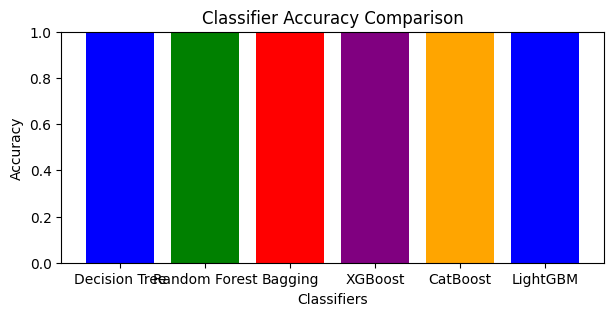

In [65]:
# Bar plot for accuracy comparison
accuracy_values = [result['Accuracy'] for result in results.values()]
classifiers_names = list(classifiers.keys())

plt.figure(figsize=(7, 3))
plt.bar(classifiers_names, accuracy_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim([0, 1])
plt.show()



Decision Tree:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57945
           1       1.00      1.00      1.00     58071

    accuracy                           1.00    116016
   macro avg       1.00      1.00      1.00    116016
weighted avg       1.00      1.00      1.00    116016




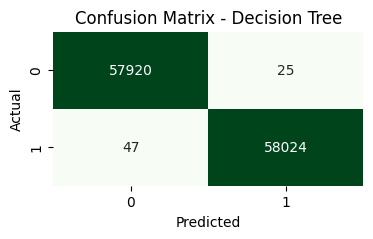


Random Forest:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57945
           1       1.00      1.00      1.00     58071

    accuracy                           1.00    116016
   macro avg       1.00      1.00      1.00    116016
weighted avg       1.00      1.00      1.00    116016




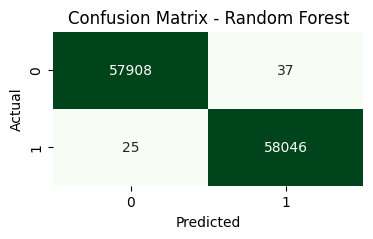


Bagging:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57945
           1       1.00      1.00      1.00     58071

    accuracy                           1.00    116016
   macro avg       1.00      1.00      1.00    116016
weighted avg       1.00      1.00      1.00    116016




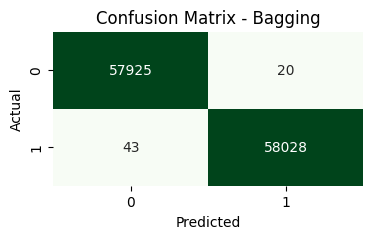


XGBoost:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57945
           1       1.00      1.00      1.00     58071

    accuracy                           1.00    116016
   macro avg       1.00      1.00      1.00    116016
weighted avg       1.00      1.00      1.00    116016




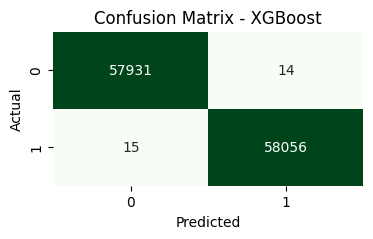


CatBoost:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57945
           1       1.00      1.00      1.00     58071

    accuracy                           1.00    116016
   macro avg       1.00      1.00      1.00    116016
weighted avg       1.00      1.00      1.00    116016




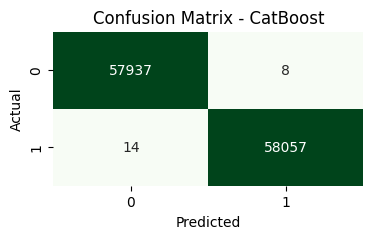


LightGBM:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57945
           1       1.00      1.00      1.00     58071

    accuracy                           1.00    116016
   macro avg       1.00      1.00      1.00    116016
weighted avg       1.00      1.00      1.00    116016




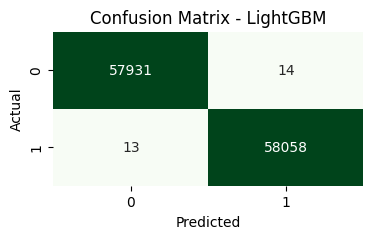

In [61]:
# Confusion matrices and classification reports
for name, result in results.items():
    print(f'\n{name}:\n')
    # print(f'Confusion Matrix:\n{result["Confusion Matrix"]}\n')
    print(f'Classification Report:\n{result["Classification Report"]}\n')

    # Plot Confusion Matrix with Blues Colormap
    plt.figure(figsize=(4, 2))
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt='g', cmap=plt.cm.Greens, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

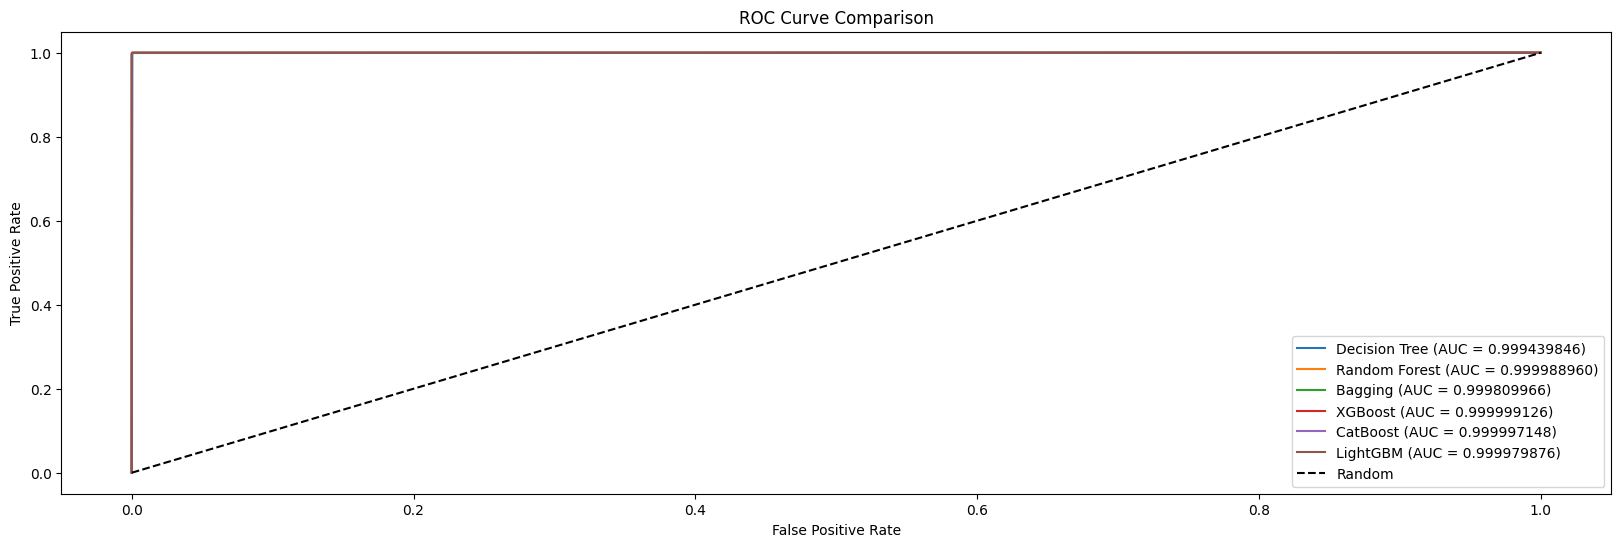

In [53]:
 # Plot ROC curves
plt.figure(figsize=(20, 6))
for name, result in results.items():
    fpr, tpr, roc_auc = result['ROC Curve']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.9f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [ ]:
clf_report = classification_report(true,
                                   pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)